## Seattle New York city Weather Project-continued

#### In this section of notebook, we will explore the data using graphs and numerical summaries and also use models.

In [33]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style('whitegrid')

 Load cleaned and merged data

In [34]:
df_cleaned = pd.read_csv('../data/clean_seattle_nyc_weather.csv') # Read the cleaned data  
df_cleaned['date'] = pd.to_datetime(df_cleaned['date']) # Convert date column to datetime format
df_cleaned.head()

,date,city,precipitation,day_of_year
0,2018-01-01,NYC,0.00,1
1,2018-01-02,NYC,0.00,2
2,2018-01-03,NYC,0.00,3
3,2018-01-04,NYC,0.49,4
4,2018-01-05,NYC,0.00,5


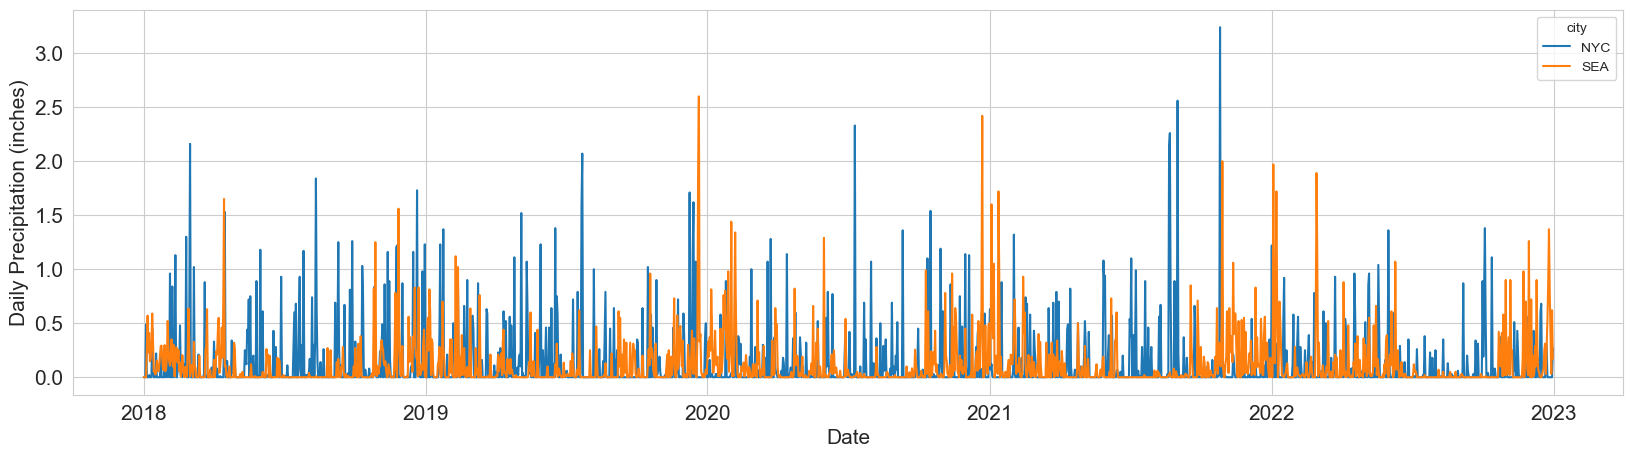

In [35]:
# Plot the precipitation data for both cities using lineplot

plt.figure(figsize=(20, 5))
sns.lineplot(data=df_cleaned, x='date', y='precipitation', hue ='city') 
plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily Precipitation (inches)', fontsize=15) 
plt.tick_params(labelsize=15)
plt.show()

<b> Observation: </b>

It's difficult to understand visually which city had more rainfall over 5 years horizon. Let's try to look at rainfall for each year. 

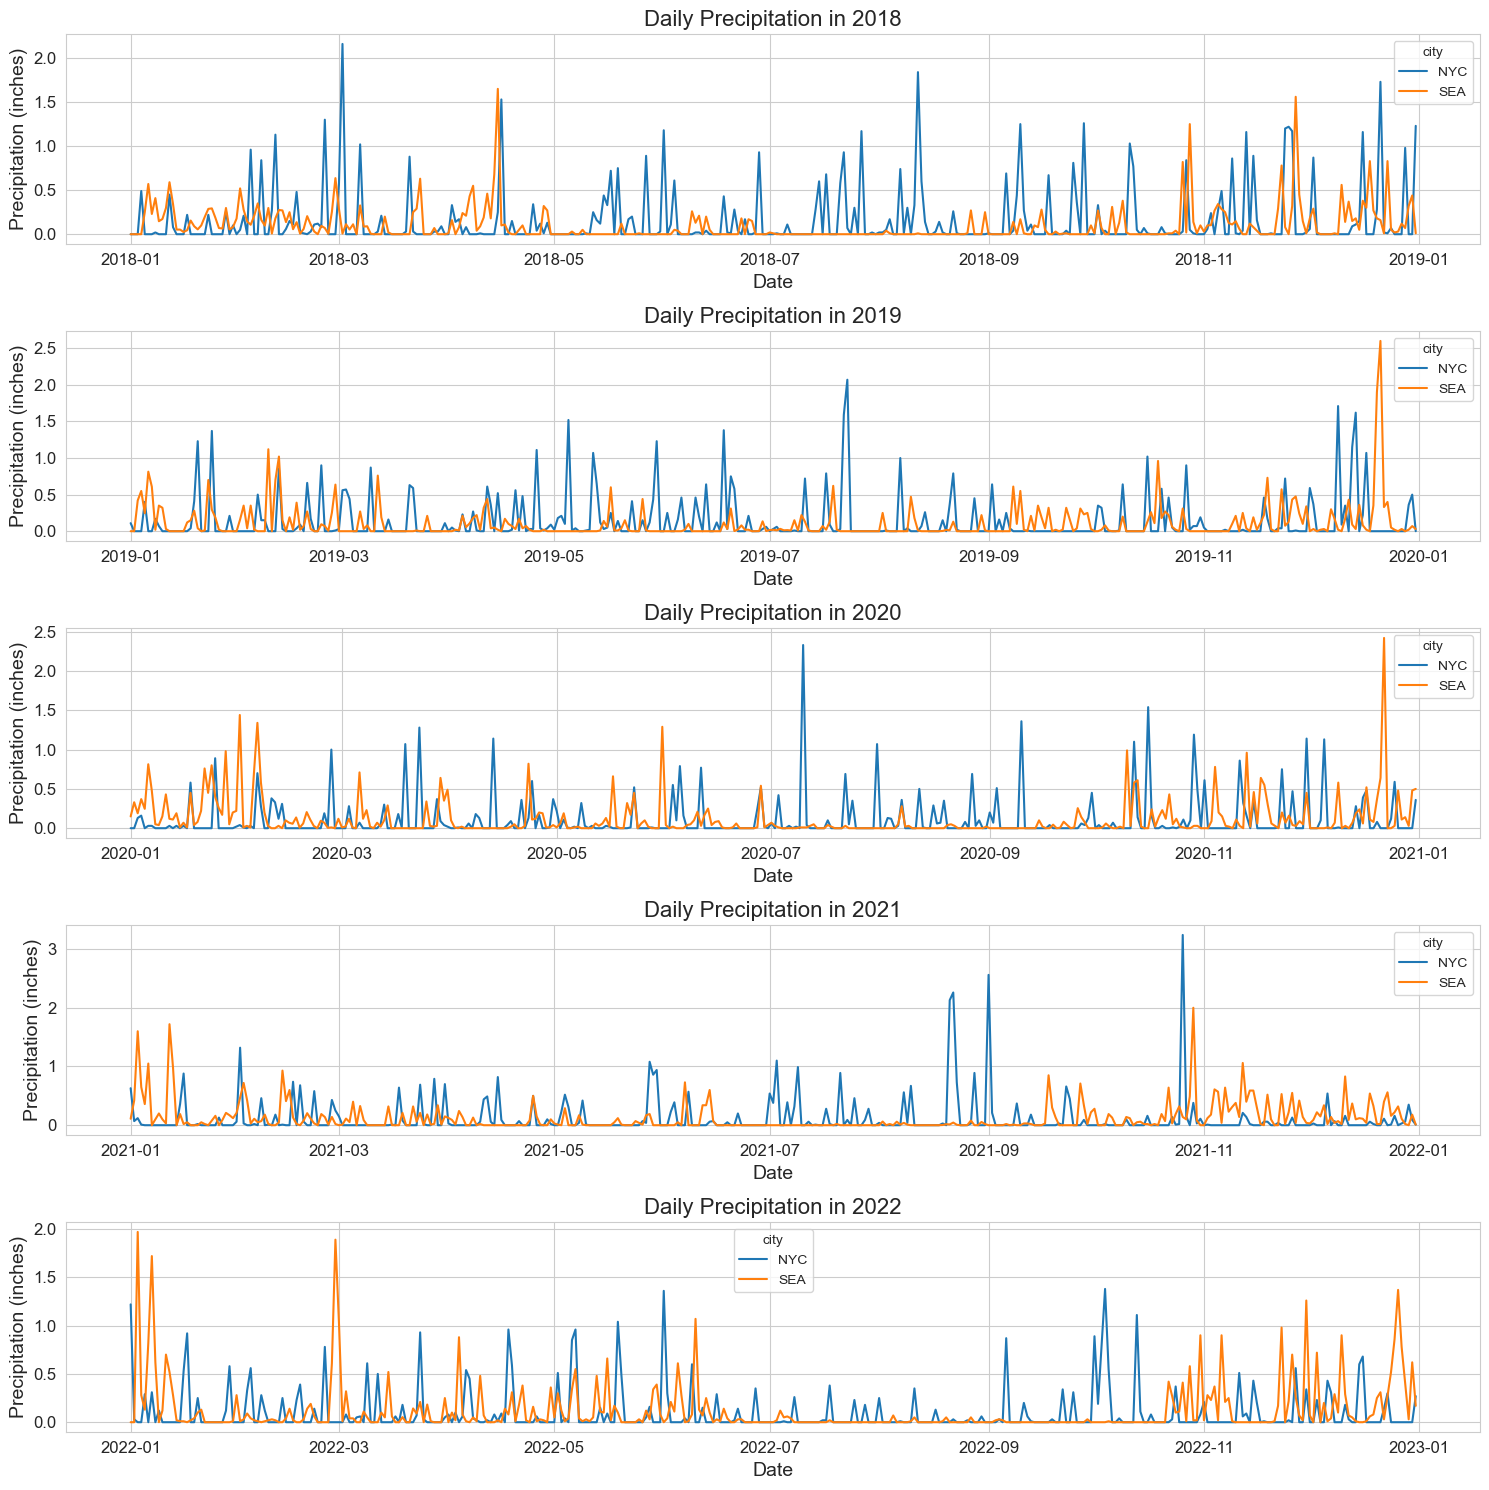

In [36]:
# Plot precipitation data for each year separately


df_cleaned['year'] = df_cleaned['date'].dt.year

# Get unique years
years = sorted(df_cleaned['year'].unique())

# Create subplots - one for each year
fig, axes = plt.subplots(len(years), 1, figsize=(15, 15), sharex=False)

# Loop through years and plot on separate axes
for i, year in enumerate(years):
    ax = axes[i]
    sns.lineplot(
        data=df_cleaned[df_cleaned['year'] == year],
        x='date', y='precipitation', hue='city', ax=ax
    )
    ax.set_title(f"Daily Precipitation in {year}", fontsize=16)
    ax.set_xlabel("Date", fontsize=14)
    ax.set_ylabel("Precipitation (inches)", fontsize=14)
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()



Observation:</br>
Looking at the yearly plots,overall, I would say NYC had more rainfall with higher variation compared to Seattle based on above visual analysis. 

Let's try to find more data driven insights to make decision on which city had higher precipitations. I want to find more concrete evidence for my claim that NYC had more rainfall with higher variation compared to seattle. 

In [37]:
# Calculate basic descriptive statistics for both cities

df_cleaned[['city','precipitation']].groupby('city').describe() 

precipitation                                               
             count     mean       std  min  25%   50%   75%   max
city                                                             
NYC         1826.0  0.12569  0.304574  0.0  0.0  0.00  0.06  3.24
SEA         1826.0  0.11327  0.240516  0.0  0.0  0.01  0.12  2.60

<b> Observation: </b>

* Based on above statistics, NYC has higher mean precipitation (0.126 inches) compared to Seattle (0.113 inches). Additionally, NYC has a higher standard deviation (0.305 inches) than Seattle (0.241 inches), indicating that NYC experiences more variability in daily precipitation levels. This falls in line with claim I made using visual insights.

/var/folders/9v/5yh40h_55xv50xhdsn75mt000000gn/T/ipykernel_55756/3500641502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='city', y='precipitation',palette=['#1f77b4', '#ff7f0e'],width=0.3)


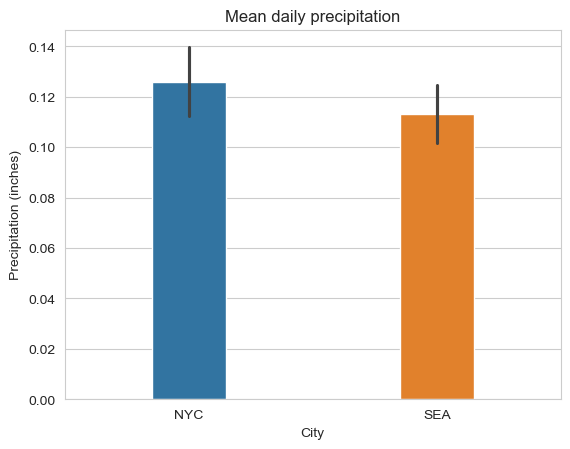

In [38]:
# Create a bar plot of mean daily precipitation for each city

sns.barplot(data=df_cleaned, x='city', y='precipitation',palette=['#1f77b4', '#ff7f0e'],width=0.3)
plt.xlabel('City', fontsize=10)
plt.ylabel('Precipitation (inches)', fontsize=10) 
plt.title('Mean daily precipitation')

plt.tick_params(labelsize=10)
plt.show()

<b> Observation: </b>
* Based on the graph, NYC has higher precipitation than Seattle

In [39]:
df_cleaned.groupby(['city', 'year'])['precipitation'].describe()

count      mean       std  min  25%     50%     75%   max
city year                                                           
NYC  2018  365.0  0.157260  0.342176  0.0  0.0  0.0000  0.1100  2.16
     2019  365.0  0.142438  0.318912  0.0  0.0  0.0000  0.0900  2.07
     2020  366.0  0.111721  0.276617  0.0  0.0  0.0000  0.0575  2.33
     2021  365.0  0.119068  0.338383  0.0  0.0  0.0000  0.0600  3.24
     2022  365.0  0.098000  0.229765  0.0  0.0  0.0000  0.0500  1.38
SEA  2018  365.0  0.102039  0.197829  0.0  0.0  0.0075  0.1400  1.65
     2019  365.0  0.105900  0.238780  0.0  0.0  0.0100  0.1200  2.60
     2020  366.0  0.118092  0.249205  0.0  0.0  0.0200  0.1100  2.42
     2021  365.0  0.121737  0.243659  0.0  0.0  0.0200  0.1400  2.00
     2022  365.0  0.118571  0.268206  0.0  0.0  0.0100  0.1000  1.97

 <b> Observation: </b>

* Year 2018 & 2019: mean for NYC is higher compared to SEA which means that there was higher precipitation in NYC compared to SEA</br>

* Year 2020,2021,2022: mean for SEA is higher compared to NYC which means there was higher precipitation in SEA. 

Since YoY the standard deviation is on higher side, I think we also need to look at how outliers are impacting mean.</br>
Now lets compare the daily precipitation by months and plot it.</br>



In [40]:
# Create a new column for the month.

df_cleaned['month'] = pd.DatetimeIndex(df_cleaned['date']).month 
df_cleaned.head()

,date,city,precipitation,day_of_year,year,month
0,2018-01-01,NYC,0.00,1,2018,1
1,2018-01-02,NYC,0.00,2,2018,1
2,2018-01-03,NYC,0.00,3,2018,1
3,2018-01-04,NYC,0.49,4,2018,1
4,2018-01-05,NYC,0.00,5,2018,1


In [41]:
df_cleaned['month'].unique() # Check the unique values in the month column

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [42]:
df_cleaned['year'].unique() 

array([2018, 2019, 2020, 2021, 2022], dtype=int32)

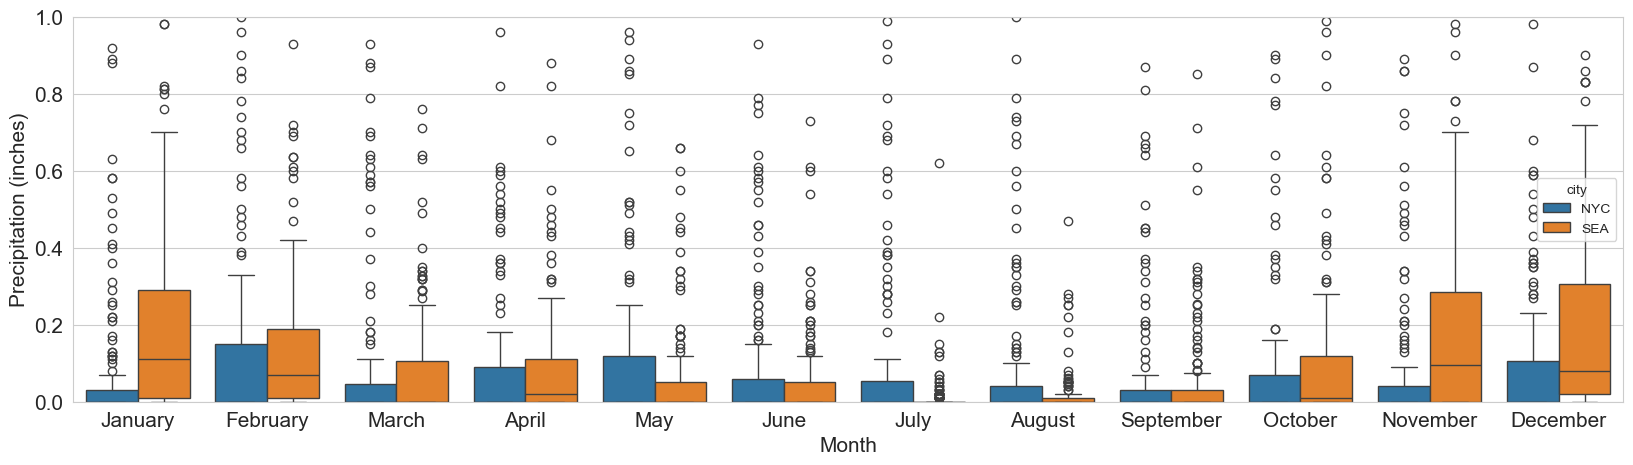

In [43]:
# Plot the distribution of daily precipitation by month for each city using boxplot

plt.figure(figsize=(20, 5))
sns.boxplot(data=df_cleaned, x='month',y='precipitation', hue='city')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15) 
plt.tick_params(labelsize=15)

# Get month names and set x-ticks labels
import calendar
month_names = list(calendar.month_name[1:]) # Get month names for x-axis labels
plt.xticks(ticks=range(12), labels=month_names) # Set x-ticks to month names
plt.ylim(0, 1.0)
plt.show()

<b> Observation: </b>
 
 For months October-Febraury Seattle has more rains compared to NYC.</br>
 During summers NYC has more rains than Seattle.</br>
 I can also see NYC has many outliers compared to Seattle which means there is high fluctuations on some days whearas Seattle has mostly consistent precipiation for most months.


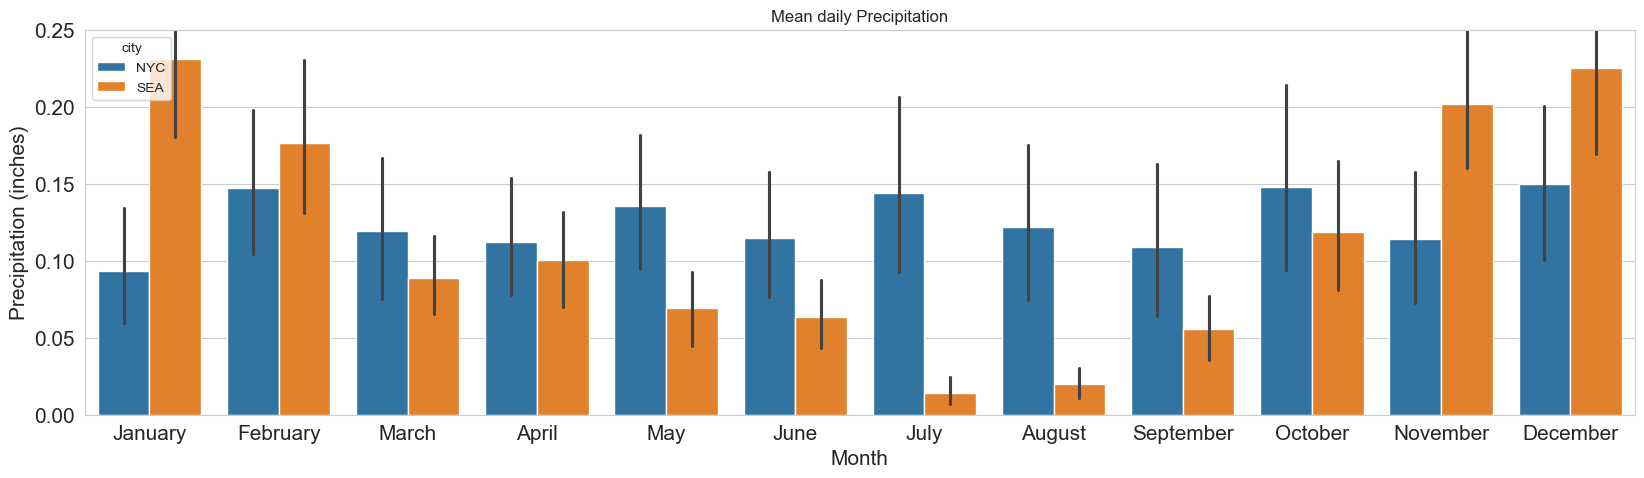

In [44]:
#  Bar plot to show mean daily precipitation by month for each city

plt.figure(figsize=(20, 5))
sns.barplot(data=df_cleaned, x='month', y='precipitation', hue='city')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15) 
plt.title('Mean daily Precipitation')
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)
plt.ylim(0,0.25) # Set y-axis limit to zoom in
plt.show()


<b> Observation: </b>

* Seattle has slightly higher precipitation during winter months November- February compared to NYC.</br>
* The errorbar overlap in December and February, suggesting these differences may not be statistically significant.</br>
* NYC has higher precipitation in summer months June-August than in Seattle.
* Overall NYC has higher precipitation than Seattle

In [45]:
 # Calculate mean  daily precipitation by city and month
df_cleaned[['month','precipitation','city']].groupby(['city','month']).mean()

precipitation
city month               
NYC  1           0.093097
     2           0.147163
     3           0.119355
     4           0.112333
     5           0.135613
     6           0.114600
     7           0.143871
     8           0.121871
     9           0.109000
     10          0.148065
     11          0.113867
     12          0.149677
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903

<b> Observation: </b>
* The above table shows the numerical summary of mean daily precipitation by month for both cities. </br>
* It indicates that Seattle has higher average precipitation during the winter months (November to February),while </br>
* New York City tends to have higher average precipitation during the summer months (June to August). </br>
* This aligns with the general climate patterns of both cities, where Seattle experiences more rainfall in the winter and NYC has more rainfall in the summer.

Now that we have seen the mean daily precipitation by month for both cities, we shall see which city had more number of days with rainfall.

In [46]:
# Add a new column indicating if any precipitation occurred

df_cleaned['any_precipitation'] = df_cleaned['precipitation']>0
df_cleaned.head()

,date,city,precipitation,day_of_year,year,month,any_precipitation
0,2018-01-01,NYC,0.00,1,2018,1,False
1,2018-01-02,NYC,0.00,2,2018,1,False
2,2018-01-03,NYC,0.00,3,2018,1,False
3,2018-01-04,NYC,0.49,4,2018,1,True
4,2018-01-05,NYC,0.00,5,2018,1,False


/var/folders/9v/5yh40h_55xv50xhdsn75mt000000gn/T/ipykernel_55756/2933312171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='city', y='any_precipitation', errorbar=None,palette=['#1f77b4', '#ff7f0e'],width=0.3)


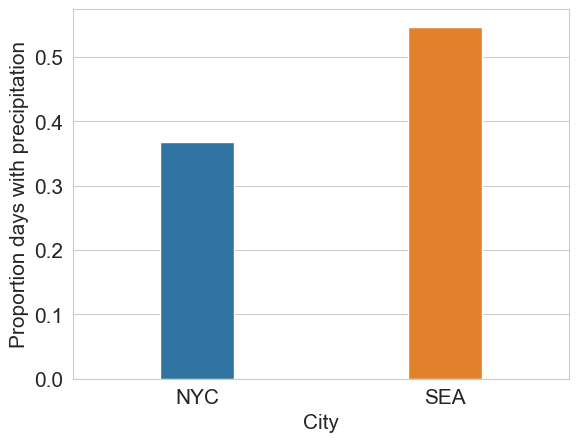

In [47]:
# Plot the proportion of days with any precipitation

sns.barplot(data=df_cleaned, x='city', y='any_precipitation', errorbar=None,palette=['#1f77b4', '#ff7f0e'],width=0.3)
plt.xlabel('City', fontsize=15)
plt.ylabel('Proportion days with precipitation', fontsize=15) 
plt.tick_params(labelsize=15)
plt.show()

<b> Observation: </b>
* The above graph depicts Seattle had more proportion of days with precipitation than NYC.

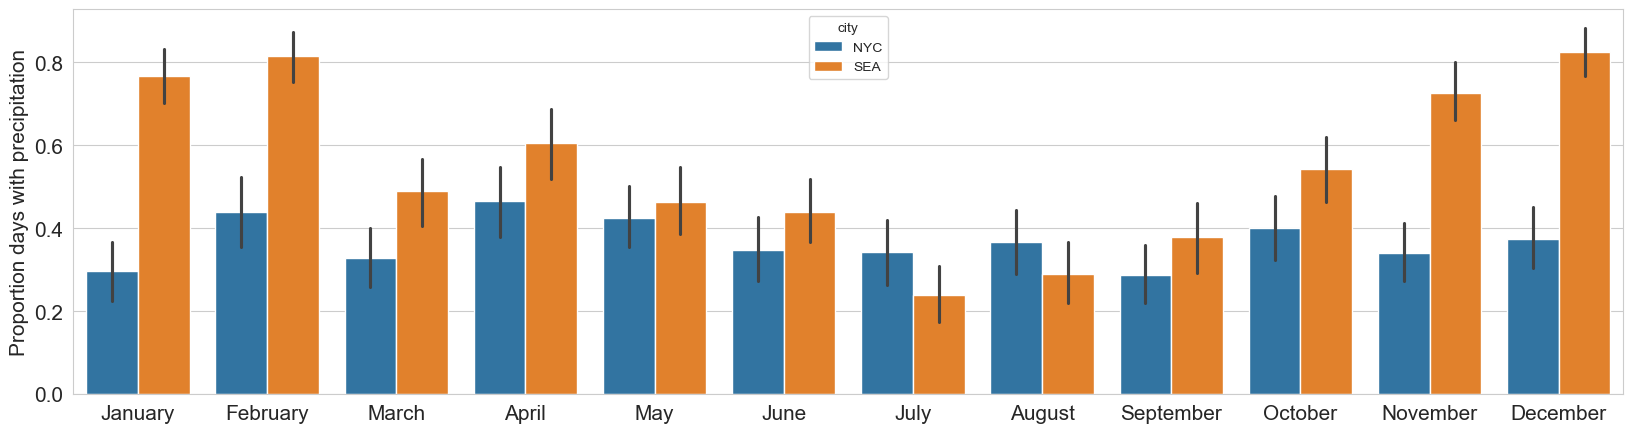

In [53]:
# Plot the proportion of days with any precipitation by month for each city
plt.figure(figsize=(20, 5))
sns.barplot(data=df_cleaned,x='month', y='any_precipitation', hue='city')
plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=15) 
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)
plt.show()

<b> Observation: </b>

* Seattle shows higher proportion of rainy days during most months especially between November-April.
* NYC's proportion of rainy days stays around 0.3 to 0.45 across the years.
* NYC shows more rainy days only in July and August.
* This clearly indicates that Seattle has greater number of rainy days across the year compared to NYC.

#### Modeling

Now that we have explored the data, we move on to the modeling step to test whether the difference in the amount of precipitation and difference in proportion of precipitation between Seattle and New York City is statistically significant.

We will first perform a statistical test for differences in the mean precipitation each month between the cities

The code below compares the mean daily precipitation between Seattle and NYC separately for each month (January → December) using Welch's two-sample t-test.
It records which months show a statistically significant difference at alpha = 0.05 and prints t-statistics and p-values.

In [49]:
from scipy import stats
# Perform a t-test to compare mean precipitation between Seattle and NYC
significance_level = 0.05
significantly_different = np.zeros(12)

#Perform t-test for each month
for month in range(1, 13):
    #get precipitation data for both cities for the current month
    seattle_data = df_cleaned[
        (df_cleaned['city']=='SEA') & (df_cleaned['month']==month)
    ]['precipitation']

    nyc_data=df_cleaned[
        (df_cleaned['city']=='NYC') & (df_cleaned['month']==month)
    ]['precipitation']
    # Perform Welch's t-test
    t_stat, p_value = stats.ttest_ind(
        seattle_data, nyc_data, equal_var = False
        )
    

    if p_value < significance_level:
        significantly_different[month-1] = 1

    print(f'Month: {month}:')
    print(f't-statistic: {t_stat:.2f}')
    print(f'p-value t test= {p_value:.3f}')
    print('_'*20)
    

Month: 1:
t-statistic: 4.11
p-value t test= 0.000
____________________
Month: 2:
t-statistic: 0.85
p-value t test= 0.397
____________________
Month: 3:
t-statistic: -1.10
p-value t test= 0.272
____________________
Month: 4:
t-statistic: -0.46
p-value t test= 0.645
____________________
Month: 5:
t-statistic: -2.51
p-value t test= 0.013
____________________
Month: 6:
t-statistic: -2.13
p-value t test= 0.034
____________________
Month: 7:
t-statistic: -4.42
p-value t test= 0.000
____________________
Month: 8:
t-statistic: -3.71
p-value t test= 0.000
____________________
Month: 9:
t-statistic: -1.92
p-value t test= 0.057
____________________
Month: 10:
t-statistic: -0.79
p-value t test= 0.431
____________________
Month: 11:
t-statistic: 2.79
p-value t test= 0.006
____________________
Month: 12:
t-statistic: 1.85
p-value t test= 0.065
____________________


Steps:</br>
- Null Hypothesis for Seattle_month = Null Hypothesis for NYC_month.
- Alternative Hypothesis for Seattle_month != Alternative Hypothesis for NYC_month.
- Perform Welch's t-test for each month from January to December.
- if p-value is greater than the significance level then reject the null hypothesis.
- So if p-value is less than 0.05 we can say that precipitation for those months between 2 cities are significantly different.

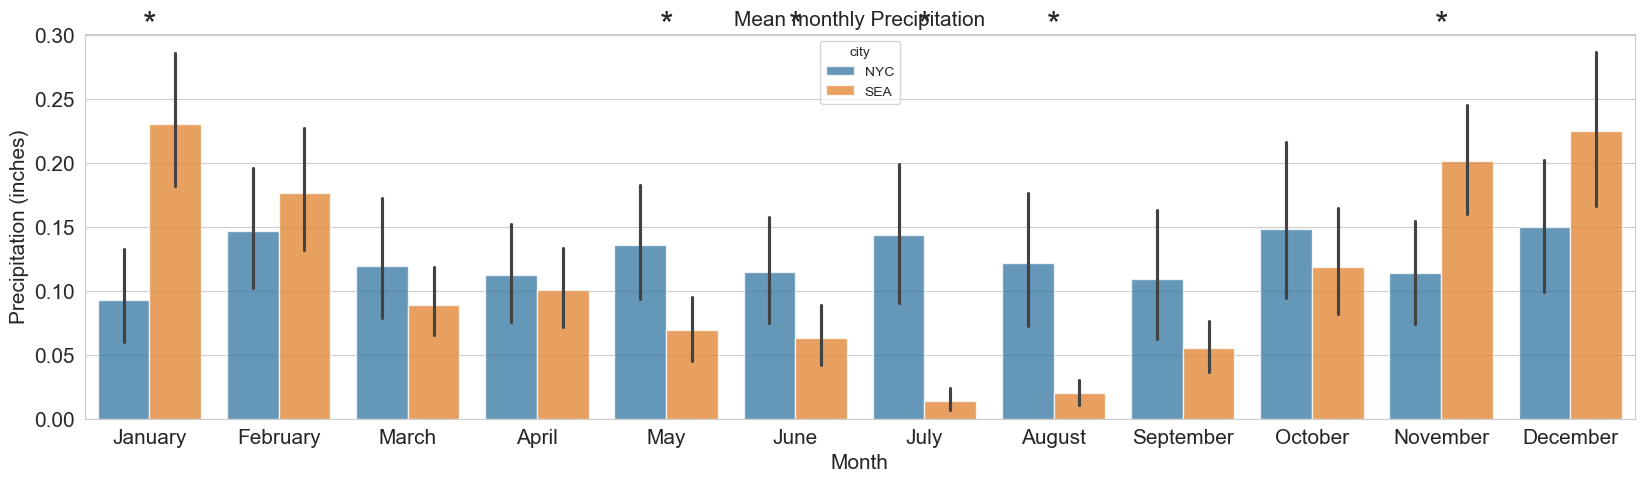

In [50]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df_cleaned, x='month', y='precipitation', hue='city', alpha=0.75)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15) 
plt.title('Mean monthly Precipitation', fontsize=15)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)

# Add starts for significantly different months
for month in range(12):   
    if significantly_different[month]==1:
        plt.text(month,0.3, '*', ha='center', fontsize=25)  
plt.show()

<b> Observation: </b>
* For months between May-August NYC has more precipitation</br>
* For months December and January Seattle has more precipitation compared to NYC</br>


The below code performs a z-test for proportions for each month to compare the proportion of days with any precipitation between Seattle and NYC

In [51]:
from statsmodels.stats.proportion import proportions_ztest

significance_level = 0.05     
significantly_different_proportion = np.zeros(12)

#Perform z-test for proportions for each month
for month in range(1,13):

    #create a contingency table for each cities the current month
    contingency_table=pd.crosstab(
        df_cleaned[df_cleaned['month']==month]['city'],
        df_cleaned[df_cleaned['month']==month]['any_precipitation']
        )

    #calculate the number of True values(days with precipitation) for each city
    days_with_precipitation = contingency_table[True]
   
    #calculate the total number of days for each city]
    total_counts = contingency_table.sum(axis=1)

    #hypothesis test for proportions
    zstat,p_value = proportions_ztest(
        count=days_with_precipitation,
        nobs=total_counts,alternative='two-sided'
        )

    if p_value < significance_level:
        significantly_different_proportion[month-1] = 1

    print(f'Month: {month}:')
    print(f'z-statistic: {zstat:.2f}')
    print(f'p-value z test= {p_value:.3f}')
    print('_'*20)


Month: 1:
z-statistic: -8.31
p-value z test= 0.000
____________________
Month: 2:
z-statistic: -6.53
p-value z test= 0.000
____________________
Month: 3:
z-statistic: -2.89
p-value z test= 0.004
____________________
Month: 4:
z-statistic: -2.43
p-value z test= 0.015
____________________
Month: 5:
z-statistic: -0.69
p-value z test= 0.493
____________________
Month: 6:
z-statistic: -1.65
p-value z test= 0.098
____________________
Month: 7:
z-statistic: 2.00
p-value z test= 0.045
____________________
Month: 8:
z-statistic: 1.45
p-value z test= 0.147
____________________
Month: 9:
z-statistic: -1.71
p-value z test= 0.086
____________________
Month: 10:
z-statistic: -2.50
p-value z test= 0.012
____________________
Month: 11:
z-statistic: -6.71
p-value z test= 0.000
____________________
Month: 12:
z-statistic: -8.12
p-value z test= 0.000
____________________



**Steps:**
- For each month, a contingency table is created showing the count of days with and without precipitation for each city.
- The number of days with precipitation and the total number of days for each city are calculated.
- Perform z-test for each month from January to December.
- If p-value is greater than the significance level then reject the null hypothesis
- So if p-value is less than 0.05 we can say that precipitation for month between 2 cities are significantly different


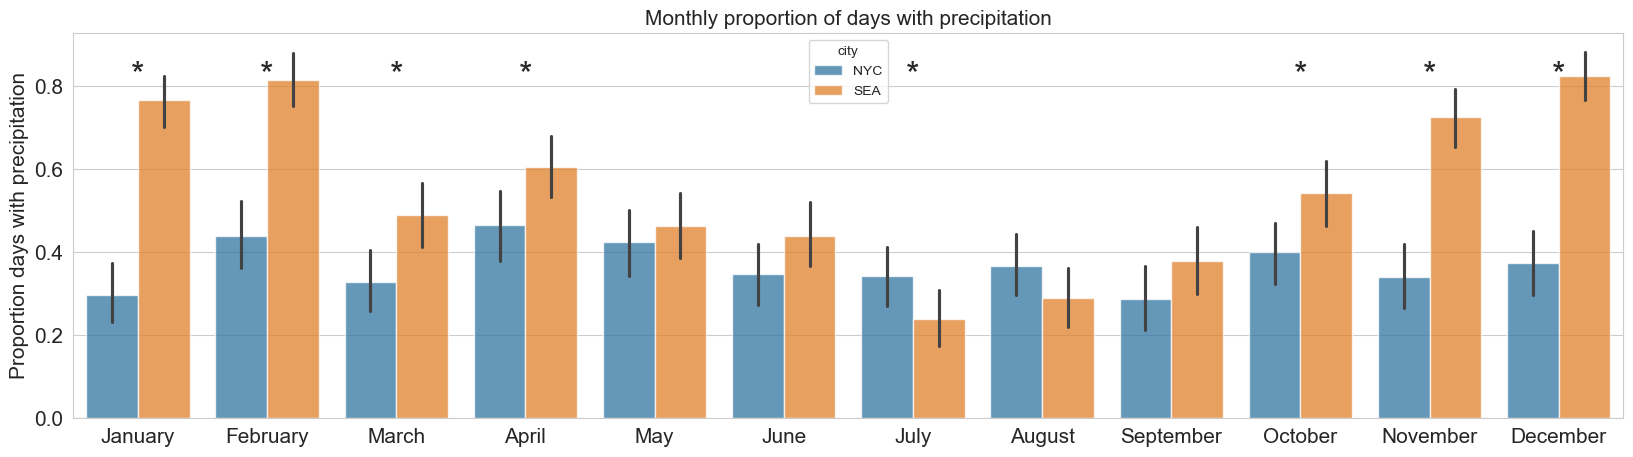

In [52]:
# Plot the proportion of days with any precipitation by month for each city,highlighting significant differences
plt.figure(figsize=(20, 5))
sns.barplot(data=df_cleaned, x='month', y='any_precipitation', hue='city', alpha=0.75)
plt.xlabel(None)
plt.ylabel('Proportion days with precipitation', fontsize=15) 
plt.title('Monthly proportion of days with precipitation', fontsize=15)
plt.xticks(ticks=range(12), labels=month_names)
plt.tick_params(labelsize=15)

# Add starts for significantly different months
for month in range(12):   
    if significantly_different_proportion[month] == 1:
        plt.text(month, 0.80, '*', ha='center', fontsize=25)  
plt.show()

<b> Observation: </b>

* For months October- April there is significant difference in any precipitation between Seattle and NYC. So we can conclude that Seattle has more number of days of precipitation than NYC.